# Leitura de arquivo e representando com Voss

In [ ]:
# Importa biopython pro colab
try:
    import google.colab
    # Running on Google Colab, so install Biopython first
    !pip install biopython
except ImportError:
    pass



In [ ]:
# abre permissão pra acessar o google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading both sequence example files

from Bio import SeqIO
import numpy as np

filename_lncRNA = 'drive/MyDrive/ColabNotebooks/IC/Primeiro_trab_IC/lncRNA.fasta'
filename_mRNA = 'drive/MyDrive/ColabNotebooks/IC/Primeiro_trab_IC/mRNA.fasta'

read_lncRNA = SeqIO.parse(filename_lncRNA, 'fasta')
read_mRNA = SeqIO.parse(filename_mRNA, 'fasta')

# Puts the instances of the sequences into a python list
sequences_lncRNA = [list(str(sequence.seq).upper()) for sequence in read_lncRNA]
sequences_mRNA = [list(str(sequence.seq).upper()) for sequence in read_mRNA]

# print(sequences_mRNA[0])

print(sequences_lncRNA[0])

['G', 'T', 'T', 'A', 'G', 'T', 'A', 'C', 'A', 'A', 'T', 'T', 'C', 'A', 'A', 'C', 'C', 'T', 'A', 'G', 'T', 'A', 'C', 'A', 'A', 'C', 'C', 'A', 'T', 'G', 'T', 'T', 'A', 'G', 'C', 'A', 'G', 'A', 'G', 'G', 'C', 'A', 'G', 'T', 'T', 'A', 'C', 'A', 'C', 'T', 'T', 'A', 'G', 'A', 'C', 'A', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'T', 'A', 'T', 'T', 'C', 'T', 'A', 'A', 'C', 'A', 'T', 'G', 'T', 'T', 'T', 'G', 'A', 'A', 'A', 'T', 'G', 'T', 'T', 'G', 'T', 'C', 'T', 'A', 'A', 'G', 'T', 'T', 'T', 'G', 'T', 'G', 'C', 'C', 'T', 'G', 'T', 'C', 'G', 'A', 'C', 'A', 'T', 'G', 'G', 'A', 'T', 'G', 'A', 'T', 'A', 'T', 'A', 'A', 'A', 'A', 'G', 'C', 'C', 'A', 'G', 'G', 'G', 'T', 'A', 'G', 'A', 'A', 'A', 'A', 'A', 'T', 'T', 'A', 'C', 'A', 'A', 'T', 'G', 'T', 'C', 'A', 'A', 'G', 'T', 'T', 'A', 'A', 'T', 'G', 'A', 'C', 'G', 'A', 'C', 'C', 'C', 'T', 'G', 'T', 'A', 'C', 'A', 'A', 'G', 'A', 'A', 'G', 'A', 'G', 'G', 'G', 'C', 'G', 'A', 'A', 'C', 'A', 'A', 'G', 'A', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'G', 'T', 'G', 'A',

In [ ]:
# Checando se a leitura só retornou valores de bases maiusculas

def check_sequences(sequences):

  checked_sequences = []

  # Exclui os valores repetidos 
  for sequence in sequences:
    checked_sequences.append(set(sequence))

  # Checa se numero de sets retornados de todas as sequencias tem o mesmo valor que o numero de sequencias
  if list(checked_sequences).count(checked_sequences[0]) == len(list(checked_sequences)):
    return True
  else:
    return False

print('lncRNA:', check_sequences(sequences_lncRNA), '\nmRNA:', check_sequences(sequences_mRNA))

lncRNA: True 
mRNA: True


Representação Voss de transformação de bases:

A = [1, 0, 0, 0]

C = [0, 1, 0, 0] 
  
G = [0, 0, 1, 0]
  
T = [0, 0, 0, 1]

Transformação de uma sequencia 

seq = ['A', 'C', 'C', 'T']

seq = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1]]

In [ ]:

def list2Voss(sequences):

  voss_sequences = []

  # cria dicionario onde cada letra tem um index da posição que será colocado 1 no vetor gerado
  bases2idx = {'A': 0 , 'C': 1, 'G': 2, 'T': 3}

  for sequence in sequences:
    onehot_vec = np.zeros((len(sequence), 4))

    for idx, base in enumerate(sequence):
      onehot_vec[idx][bases2idx[base]] = 1

    voss_sequences.append(onehot_vec)

  return voss_sequences

voss_lncRNA = list2Voss(sequences_lncRNA)
voss_mRNA = list2Voss(sequences_mRNA)

print(voss_lncRNA[1][:7])

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


# Pré-processamento dos dados
No final gera uma lista de features onde cada linha é uma sequencia

In [ ]:
# Função que faz a transposta de todas as sequencias voss numa lista de sequencias voss
def transpose_voss(voss_sequences):

  transposed_voss_sequences = []

  for idx, sequence in enumerate(voss_sequences): 
    transposed_voss_sequences.append(voss_sequences[idx].transpose())

  return transposed_voss_sequences

In [ ]:
from numpy.fft import fft

def fft_voss(voss_sequences):

  PV_sequences = []

  t_voss_sequences = transpose_voss(voss_sequences)

  # Em cada pow(fft... calcula a fft de uma dada base, após isso eleva ao quadrado e as soma pra compor o espectro geral
  for sequence in t_voss_sequences:
    PV_sequence = pow(abs(fft(sequence[0])), 2) + pow(abs(fft(sequence[1])), 2) + pow(abs(fft(sequence[2])), 2) + pow(abs(fft(sequence[3])), 2)
    PV_sequences.append(PV_sequence)

  return PV_sequences

Calcula o RMS(Root Square Mean)

$$x_{rms} = \sqrt{\frac{1}{n}(x_1^2 + x_2^2 + ... + x_n^2)}$$

Calcula o PAPR usando a seguinte função

$$PAPR = \frac{|x_{peak}|^2}{x_{rms}^2}=C^2$$

In [ ]:
def complex_sqrt(values):
  return pow(values, 1/2)


def calculate_rms(PV_sequence):

  rms_PV = (complex_sqrt(pow(PV_sequence, 2)/len(PV_sequence))).sum()
  
  return rms_PV


def PAPR_PV(PV_sequences):
  PAPR_sequences = []

  for PV_sequence in PV_sequences:
    PAPR_sequences.append((PV_sequence.max())/calculate_rms(PV_sequence))
    
  return PAPR_sequences



In [ ]:
def mean_PV(PV_sequences):
  mean_PV = []

  for PV_sequence in PV_sequences:
    mean_PV.append(PV_sequence.mean())

  return mean_PV

In [ ]:
def median_PV(PV_sequences):
  median_PV = []

  for PV_sequence in PV_sequences:
    median_PV.append(np.median(PV_sequence))

  return median_PV

In [ ]:
def max_PV(PV_sequences):
  max_PV = []

  for PV_sequence in PV_sequences:
    max_PV.append(np.max(PV_sequence))

  return max_PV

In [ ]:
def min_PV(PV_sequences):
  min_PV = []

  for PV_sequence in PV_sequences:
    min_PV.append(np.min(PV_sequence))

  return min_PV

In [ ]:
def std_PV(PV_sequences):
  std_PV = []

  for PV_sequence in PV_sequences:
    std_PV.append(np.std(PV_sequence))

  return std_PV

In [ ]:
def quantile_PV(PV_sequences, percentage):
  quantile_PV = []

  for PV_sequence in PV_sequences:
    quantile_PV.append(np.quantile(PV_sequence, percentage))

  return quantile_PV

In [ ]:
def get_features_voss(voss_sequences):
  features = []

  PV = fft_voss(voss_sequences)
  
  mean = mean_PV(PV)
  features.append(mean)

  median = median_PV(PV)
  features.append(median)

  max = max_PV(PV)
  features.append(max)

  min = min_PV(PV)
  features.append(min)

  std = std_PV(PV)
  features.append(std)

  quantile15 = quantile_PV(PV, 0.15)
  features.append(quantile15)
  
  quantile25 = quantile_PV(PV, 0.25)
  features.append(quantile25)

  quantile50 = quantile_PV(PV, 0.5)
  features.append(quantile50)

  quantile75 = quantile_PV(PV, 0.75)
  features.append(quantile75)
  
  amplitude = np.array(max) - np.array(min)
  features.append(amplitude)

  variance = pow(np.array(std), 2)
  features.append(variance)

  interquartile_range = np.array(quantile75) - np.array(quantile25)
  features.append(interquartile_range)

  semi_interquartile_range = (np.array(quantile75) - np.array(quantile25))/2
  features.append(semi_interquartile_range)

  coefficient_var = np.array(std)/np.array(mean)
  features.append(coefficient_var)

  skewness = (3 * (np.array(mean) - np.array(median)))/np.array(std)
  features.append(skewness)

  kurtosis = (np.array(quantile_PV(PV, 0.75)) - np.array(quantile_PV(PV, 0.25))) / (2 * (np.array(quantile_PV(PV, 0.90)) - np.array(quantile_PV(PV, 0.10)))) 
  features.append(kurtosis)

  PAPR = PAPR_PV(PV)
  features.append(PAPR)
  
  return features

In [ ]:
import pandas as pd

df_lncRNA = pd.DataFrame(get_features_voss(voss_lncRNA)).transpose()
df_lncRNA['target'] = ['lncRNA'] * df_lncRNA.shape[0]

df_mRNA = pd.DataFrame(get_features_voss(voss_mRNA)).transpose()
df_mRNA['target'] = ['mRNA'] * df_mRNA.shape[0]

frame = [df_lncRNA, df_mRNA]

df_sequences = pd.concat(frame)

df_sequences.columns = ['mean', 'median', 'max', 'min', 'std', 'quantile15', 'quantile25',
                        'quantile50', 'quantile75', 'amplitude', 'variance', 'interquartile_range',
                        'semi_interquartile_range', 'coefficient_var', 'skewness', 'kurtosis', 'PAPR', 'target']


df_sequences.head()

,mean,median,max,min,std,quantile15,quantile25,quantile50,quantile75,amplitude,variance,interquartile_range,semi_interquartile_range,coefficient_var,skewness,kurtosis,PAPR,target
0,240.0,156.400548,15242.0,19.527509,976.627872,85.422311,100.447431,156.400548,227.660606,15222.472491,953802.0,127.213174,63.606587,4.069283,0.256800,0.264977,4.099445,lncRNA
1,261.0,170.453589,17205.0,32.876418,1059.696183,73.298345,106.540399,170.453589,243.711978,17172.123582,1122956.0,137.171579,68.585789,4.060139,0.256337,0.227302,4.080317,lncRNA
2,267.0,132.451038,25253.0,16.628202,1538.561016,63.422245,81.812559,132.451038,201.394808,25236.371798,2367170.0,119.582248,59.791124,5.762401,0.262354,0.189654,5.788234,lncRNA
3,210.0,136.546051,11278.0,25.555269,770.553048,72.612362,98.279231,136.546051,193.353738,11252.444731,593752.0,95.074507,47.537254,3.669300,0.285979,0.190630,3.705981,lncRNA
4,237.0,157.955086,14267.0,27.184058,919.052773,80.519498,103.470809,157.955086,222.849203,14239.815942,844658.0,119.378394,59.689197,3.877860,0.258021,0.240955,3.910301,lncRNA


In [ ]:
X = df_sequences.drop(['target'], axis=1)
y = df_sequences['target']
y[:5]

0    lncRNA
1    lncRNA
2    lncRNA
3    lncRNA
4    lncRNA
Name: target, dtype: object

# Random Forest 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True, stratify=df_sequences['target'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate


RF = RandomForestClassifier()

cv_return = cross_validate(RF, X_train, y_train, cv=10, return_estimator=True, return_train_score=False)

scores = cv_return['test_score']

scores

array([0.9218107 , 0.91906722, 0.91358025, 0.9122085 , 0.92455418,
       0.90260631, 0.92455418, 0.91495199, 0.92592593, 0.90934066])

In [ ]:
best_RF = cv_return['estimator'][np.argmax(scores, axis=0)]

In [ ]:
from sklearn.metrics import accuracy_score
accurracy = accuracy_score(best_RF.predict(X_test), y_test)
accurracy

0.9111354909489852

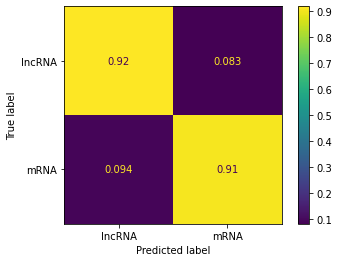

<Figure size 1800x720 with 0 Axes>

In [ ]:
 import matplotlib.pyplot as plt
 from sklearn.metrics import plot_confusion_matrix

 plot_confusion_matrix(best_RF, X_test, y_test, normalize='true') 
 plt.figure(figsize=(25,10))
 plt.show()